# Importing Necessary libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [2]:
# reading the data
df=pd.read_excel("final.xlsx")

In [3]:
df.head()

,Date,Day,Ward,Vehicle No,Route,Time,Waste (kg),Animal
0,14-10-2020,Wednesday,A,5102,A1M,09:10:00,0,Pig
1,14-10-2020,Wednesday,A,3137,A2M,09:15:00,0,0
2,14-10-2020,Wednesday,A,3127,A3M,09:20:00,15,0
3,14-10-2020,Wednesday,A,3136,A1M,09:30:00,20,0
4,14-10-2020,Wednesday,A,3137,A2M,11:30:00,0,0


# Data Pre-Processing 

In [4]:
df.shape

(4922, 8)

In [5]:
# checking null values
df.isnull().sum()

Date          0
Day           0
Ward          0
Vehicle No    0
Route         0
Time          0
Waste (kg)    0
Animal        0
dtype: int64

In [6]:
df["Animal"].value_counts()

0       4172
Pig      506
Dog      213
Cat       26
Dog        2
Crow       1
Pig,       1
COW        1
Name: Animal, dtype: int64

In [7]:
df["Animal"].unique()

array(['Pig', 0, 'Dog', 'Cat', 'Dog ', 'COW', 'Crow', 'Pig,'],
      dtype=object)

In [8]:
# cleaning names
df['Animal']=df['Animal'].str.replace("Dog ","Dog")
df['Animal']=df['Animal'].str.replace("Pig,","Pig")

In [9]:
df["Animal"].value_counts()

Pig     507
Dog     215
Cat      26
Crow      1
COW       1
Name: Animal, dtype: int64

In [10]:
df['Waste (kg)'].describe()

count    4922.000000
mean       34.445754
std        40.186656
min         0.000000
25%         0.000000
50%        25.000000
75%        60.000000
max      1000.000000
Name: Waste (kg), dtype: float64

In [11]:
df['Day'].unique()

array(['Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Thursday', 'Friday\xa0', 'Sunday\xa0', 'Monday\xa0',
       'Tuesday\xa0'], dtype=object)

In [12]:
# cleaning days
df['Day']=df['Day'].str.replace('Thrusday',"Thursday")
df['Day']=df['Day'].str.replace('Friday\xa0',"Friday")
df['Day']=df['Day'].str.replace('Sunday\xa0',"Sunday")
df['Day']=df['Day'].str.replace('Monday\xa0',"Monday")
df['Day']=df['Day'].str.replace('Tuesday\xa0',"Tuesday")

In [13]:
df['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [14]:
df['Vehicle No'].unique()

array([5102, 3137, 3127, 3136, 5113, 3145, 3147, 3130, 3124, 5103, 3113,
       3134, 3143, 5713, 3107, 3139, 3146, 3123, 5107, 3125, 3175, 5117,
       3102, 3138, 3156, 5137, 3131, 3157, 3135,    0, 5136, 3144, 5162,
       3117, 3121, 3129, 5118, 3105, 3177, 3197, 3195, 1347, 5101, 5144,
       3128, 3126, 5046, 3108, 5096, 5095, 5066, 3142, 5098, 3198, 3120,
       3501, 5198, 3096, 5196, 5798, 5051, 5090, 3028, 5128, 3140, 3133,
       3141, 5112, 2135, 5163, 3729, 5512, 5712, 5108, 5115, 3112, 3155,
       3103, 5143], dtype=int64)

In [15]:
df['Vehicle No'].value_counts()

3146    251
3128    228
3137    219
5096    216
3130    216
       ... 
5095      1
3028      1
5051      1
5136      1
5798      1
Name: Vehicle No, Length: 79, dtype: int64

#  Feature Engineering

In [16]:
values = df['Vehicle No'].value_counts().keys().tolist()
counts = df['Vehicle No'].value_counts().tolist()

In [17]:
# pritning all vehicle numbers
print(values)

[3146, 3128, 3137, 5096, 3130, 3138, 3139, 3135, 3136, 3141, 3143, 3125, 3142, 3129, 5098, 3127, 3147, 3126, 5113, 3145, 3144, 3133, 3140, 5112, 5102, 5101, 5103, 3134, 0, 3124, 3120, 3102, 3105, 3157, 3195, 5137, 3108, 3113, 5713, 5128, 3123, 5118, 5117, 5198, 3175, 5046, 5512, 5712, 5066, 3121, 5090, 3117, 5162, 3197, 3198, 3177, 5144, 3501, 3729, 3103, 5108, 3107, 2135, 3156, 3131, 1347, 5196, 5163, 3112, 3096, 5143, 5115, 5107, 3155, 5095, 3028, 5051, 5136, 5798]


In [18]:
# value count of each vehicle
print(counts)

[251, 228, 219, 216, 216, 212, 209, 207, 207, 201, 196, 195, 190, 189, 188, 182, 180, 175, 172, 172, 169, 132, 119, 110, 102, 102, 99, 11, 6, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
# renaming column
df.rename(columns = {'Vehicle No' : 'Vehicle_No'}, inplace = True)

In [20]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

In [21]:
# applying filter to remove vehicles with low count to reduce cardinality
df=filter_rows_by_values(df,"Vehicle_No", ['3102', '3120', '3105', '3157', '3108', '5713', '3123', '5128', '5137', '3195', '3156', '3121', '5198', '3131', '5196', '3155', '3175', '5512', '3117', '3197', '5162', '3113', '5712', '5118', '5117', '5090', '5066', '3177', '3501', '2135', '3729', '5108', '3198', '5136', '5144', '5163', '3112', '3103', '3096', '5143', '5115', '5107', '3107', '5095', '3028', '5051', '9137', '5798', '5046','0','1347'])

In [22]:
df.shape

(4854, 8)

In [23]:
values = df['Vehicle_No'].value_counts().keys().tolist()
counts = df['Vehicle_No'].value_counts().tolist()

In [24]:
print(values)

[3146, 3128, 3137, 3130, 5096, 3138, 3139, 3136, 3135, 3141, 3143, 3125, 3142, 3129, 5098, 3127, 3147, 3126, 5113, 3145, 3144, 3133, 3140, 5112, 5101, 5102, 5103, 3134, 3124]


In [25]:
print(counts)

[251, 228, 219, 216, 216, 212, 209, 207, 207, 201, 196, 195, 190, 189, 188, 182, 180, 175, 172, 172, 169, 132, 119, 110, 102, 102, 99, 11, 5]


In [26]:
# converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4854 entries, 0 to 4921
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4854 non-null   datetime64[ns]
 1   Day         4854 non-null   object        
 2   Ward        4854 non-null   object        
 3   Vehicle_No  4854 non-null   int64         
 4   Route       4854 non-null   object        
 5   Time        4854 non-null   object        
 6   Waste (kg)  4854 non-null   int64         
 7   Animal      738 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 341.3+ KB


In [28]:
# splitting date into day,month,year columns
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Month"] = df["Date"].map(lambda x: x.month)
df["Year"] = df["Date"].map(lambda x: x.year)
df["Day"] = df["Date"].map(lambda x: x.day)

In [29]:
df.head()

,Date,Day,Ward,Vehicle_No,Route,Time,Waste (kg),Animal,Month,Year
0,2020-10-14,14,A,5102,A1M,09:10:00,0,Pig,10,2020
1,2020-10-14,14,A,3137,A2M,09:15:00,0,NaN,10,2020
2,2020-10-14,14,A,3127,A3M,09:20:00,15,NaN,10,2020
3,2020-10-14,14,A,3136,A1M,09:30:00,20,NaN,10,2020
4,2020-10-14,14,A,3137,A2M,11:30:00,0,NaN,10,2020


In [30]:
df=df.drop(['Date'],axis=1)

In [31]:
# splitting time into hour and minute
df['Time']=df['Time'].astype(str)
df['Hour']=df.Time.str[0:2]
df['Minutes']=df.Time.str[3:5]

In [32]:
df=df.drop(['Time'],axis=1)

In [33]:
df.head()

,Day,Ward,Vehicle_No,Route,Waste (kg),Animal,Month,Year,Hour,Minutes
0,14,A,5102,A1M,0,Pig,10,2020,09,10
1,14,A,3137,A2M,0,NaN,10,2020,09,15
2,14,A,3127,A3M,15,NaN,10,2020,09,20
3,14,A,3136,A1M,20,NaN,10,2020,09,30
4,14,A,3137,A2M,0,NaN,10,2020,11,30


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4854 entries, 0 to 4921
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         4854 non-null   int64 
 1   Ward        4854 non-null   object
 2   Vehicle_No  4854 non-null   int64 
 3   Route       4854 non-null   object
 4   Waste (kg)  4854 non-null   int64 
 5   Animal      738 non-null    object
 6   Month       4854 non-null   int64 
 7   Year        4854 non-null   int64 
 8   Hour        4854 non-null   object
 9   Minutes     4854 non-null   object
dtypes: int64(5), object(5)
memory usage: 417.1+ KB


In [35]:
# conveting hour and minute columns to int type
df['Hour']=df['Hour'].astype(int)

In [36]:
df=filter_rows_by_values(df,"Minutes", ['3-','0-'])

In [37]:
df['Minutes']=df['Minutes'].astype(int)

In [38]:
df['Waste (kg)']=df['Waste (kg)'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 0 to 4921
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         4853 non-null   int64 
 1   Ward        4853 non-null   object
 2   Vehicle_No  4853 non-null   int64 
 3   Route       4853 non-null   object
 4   Waste (kg)  4853 non-null   int32 
 5   Animal      738 non-null    object
 6   Month       4853 non-null   int64 
 7   Year        4853 non-null   int64 
 8   Hour        4853 non-null   int32 
 9   Minutes     4853 non-null   int32 
dtypes: int32(3), int64(4), object(3)
memory usage: 360.2+ KB


In [40]:
df['Route'].unique()

array(['A1M', 'A2M', 'A3M', 'A1N', 'A5M', 'A4M', 'A2N', 'A2O', 'A4N',
       'A5N', 'A7M', 'A3N', 'A2P', 'A1O', 'A1P', 'A1Q', 'A1R', 'A10',
       'A3O', 'A3P', 'A3Q', 'A5O', 'A2Q', 'A4P', 'A20', 'A2R', 'A2S',
       'B2M', 'B3M', 'B4M', 'B1M', 'B2N', 'B5M', 'B5N', 'B4N', 'B4O',
       'B5O', 'B3N', 'B1N', 'B3O', 'B1O', 'B4P', 'B4Q', 'B2O', 'B3Q',
       'B3R', 'B3P', 'B4R', 'B2N ', 'C5M', 'C2M', 'C6M', 'C5N', 'C3M',
       'C1M', 'C4M', 'C3N', 'C4N', 'C1N', 'C6N', 'C1O', 'C2N', 'C6O',
       'C5O', 'C5P', 'D3M', 'D1M', 'D2M', 'D4M', 'D5M', 'D8M', 'D7M',
       'D1N', 'D1O', 'D8N', 'D5N', 'D2N', 'D4N', 'D3N', 'D7N', 'D3O',
       'D5O', 'D9M', 'D4O', 'D40', '5BM'], dtype=object)

In [41]:
# converting vehicle number to object type
df['Vehicle_No']=df['Vehicle_No'].astype(object)

# Univariate Analysis

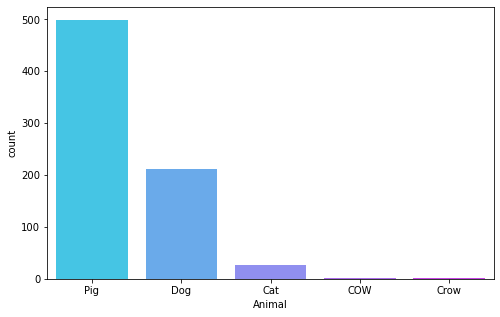

In [42]:
# Countplot
plt.figure(figsize=(8, 5))
sns.countplot(x="Animal", data=df, palette="cool")

##### Pig is observed to be the most animal found dead

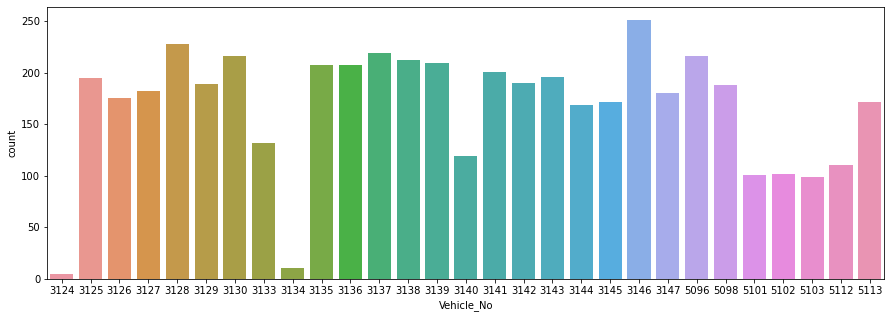

In [43]:
# Countplot
plt.figure(figsize=(15, 5))
sns.countplot(df['Vehicle_No'])

##### Vehicle_No. 3146 had the most number of trips, while 3124 had the least.

# Bivariate Analysis

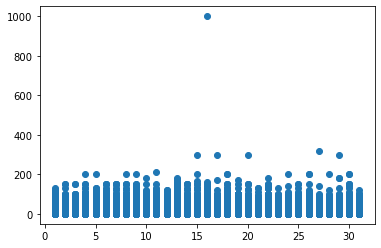

In [44]:
#Scatter Plot
plt.scatter(y=df['Waste (kg)'], x=df['Day'])
plt.show()

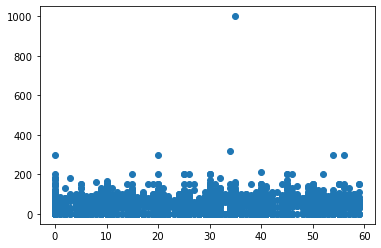

In [45]:
#Scatter Plot
plt.scatter(y=df['Waste (kg)'], x=df['Minutes'])
plt.show()

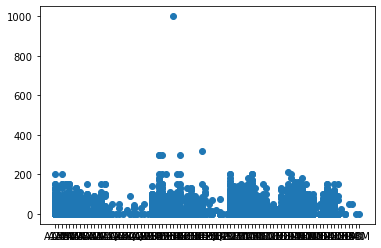

In [46]:
#Scatter Plot
plt.scatter(y=df['Waste (kg)'], x=df['Route'])
plt.show()

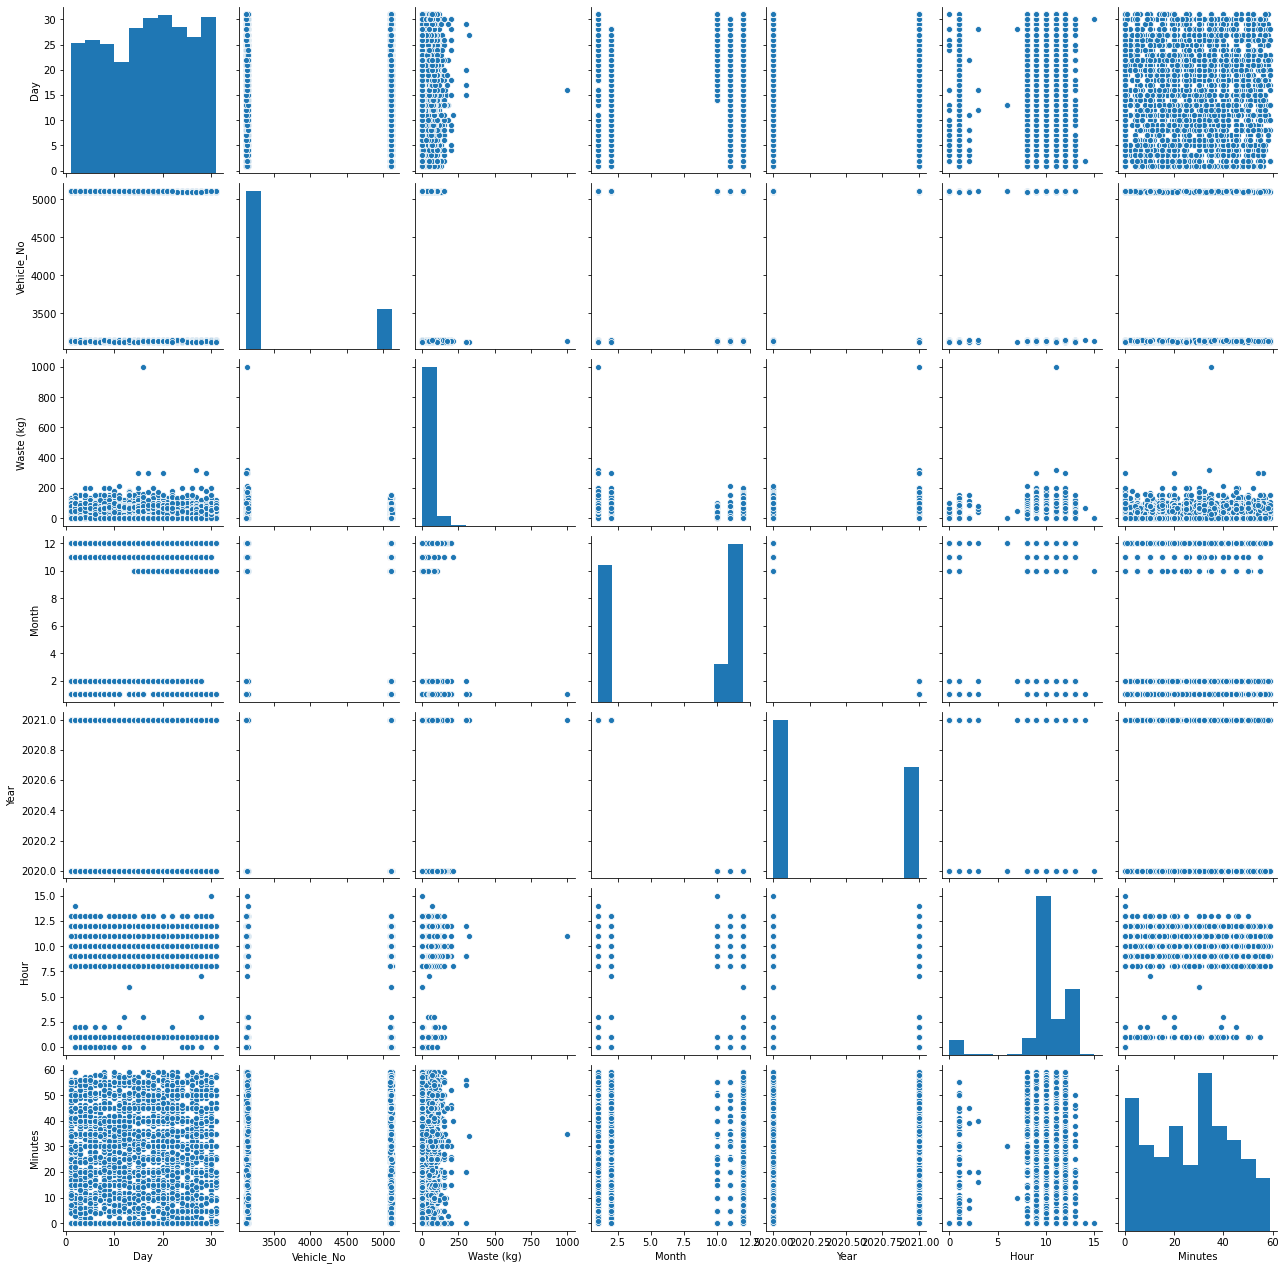

In [47]:
sns.pairplot(df)

###### We can observ that the data is not linearly seprable 

Text(0.5, 1.0, 'No. of Animals wrt Ward')

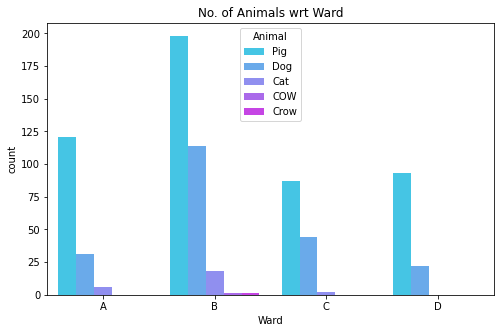

In [48]:
# Countplot
fig=plt.figure(figsize=(8, 5))
sns.countplot(x="Ward", hue="Animal", data=df, palette="cool")
plt.title("No. of Animals wrt Ward")

##### B Ward has the most no. of dead animals

In [49]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892371324' style='position: relative'><noscript><a href='#'><img alt='Bar Chart - Waste&#47;Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-WasteMonth&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;BarChart-WasteMonth' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-WasteMonth&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892371324');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### January 2021, has the highest amount of waste as compared to other months

In [50]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892301128' style='position: relative'><noscript><a href='#'><img alt='GeoPoint ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;GeoPoint&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;GeoPoint' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;GeoPoint&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892301128');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [51]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892415944' style='position: relative'><noscript><a href='#'><img alt='Bar Chart - Waste&#47;Ward Wise ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-WasteWardWise&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;BarChart-WasteWardWise' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-WasteWardWise&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892415944');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Ward D has the highest waste collected

In [52]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892565383' style='position: relative'><noscript><a href='#'><img alt='Area Plot of Animals over Weeks ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;AreaPlotofAnimalsoverWeeks&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;AreaPlotofAnimalsoverWeeks' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;AreaPlotofAnimalsoverWeeks&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892565383');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### We observe for week 3 and week 4 of Dec 2020, most number of animals are found dead

# Multivariate Analysis

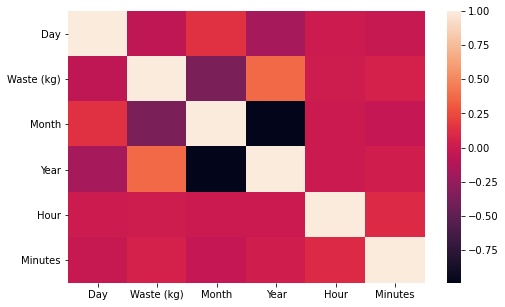

In [53]:
# Heatmap
plt.figure(figsize=(8,5))
corr1 = df.corr(method='pearson')
sns.heatmap(corr1)

##### We can observe that no two columns are highly correlated to each other, hence we dont need to drop any

In [54]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892471847' style='position: relative'><noscript><a href='#'><img alt='Bar Chart - Month&#47;Ward&#47;Waste ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-MonthWardWaste&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;BarChart-MonthWardWaste' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;BarChart-MonthWardWaste&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892471847');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [55]:
%%HTML
<div class='tableauPlaceholder' id='viz1620892589814' style='position: relative'><noscript><a href='#'><img alt='Per Route&#47;Animals ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;PerRouteAnimals&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAWasteManagement&#47;PerRouteAnimals' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAWasteManagement&#47;PerRouteAnimals&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620892589814');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### We can see Route C2M had the most number of dead animals founds

# Outlier Treatment

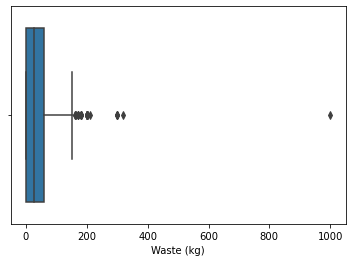

In [42]:
# boxplot to check outliers
sns.boxplot(df['Waste (kg)'])

In [43]:
# dropping animal as we dont need it futher
df=df.drop(['Animal'], axis=1)

In [44]:
df['Hour']=df['Hour'].astype(object)

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [46]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

In [47]:
df['Hour']=df['Hour'].astype(int)

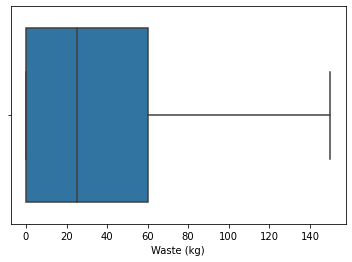

In [48]:
sns.boxplot(df['Waste (kg)'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 0 to 4921
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         4853 non-null   float64
 1   Ward        4853 non-null   object 
 2   Vehicle_No  4853 non-null   object 
 3   Route       4853 non-null   object 
 4   Waste (kg)  4853 non-null   float64
 5   Month       4853 non-null   float64
 6   Year        4853 non-null   float64
 7   Hour        4853 non-null   int32  
 8   Minutes     4853 non-null   float64
dtypes: float64(5), int32(1), object(3)
memory usage: 360.2+ KB


In [50]:
df['Day']=df['Day'].astype(int)
df['Waste (kg)']=df['Waste (kg)'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df['Minutes']=df['Minutes'].astype(int)

In [51]:
df1=df.copy()
df2=df1.copy()

In [52]:
df=pd.get_dummies(df, drop_first=True)

In [53]:
df.head()

,Day,Waste (kg),Month,Year,Hour,Minutes,Ward_B,Ward_C,Ward_D,Vehicle_No_3125,...,Route_D4N,Route_D4O,Route_D5M,Route_D5N,Route_D5O,Route_D7M,Route_D7N,Route_D8M,Route_D8N,Route_D9M
0,14,0,10,2020,9,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,10,2020,9,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,15,10,2020,9,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,20,10,2020,9,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,10,2020,11,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# assigning a minimum value for waste 
df['Waste (kg)']=df['Waste (kg)'].replace(to_replace=0,value =5)

# Standardization of Data

In [55]:
scaler = StandardScaler()
num_vars = ['Day','Month','Waste (kg)','Year','Hour','Minutes']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [56]:
df.head()

,Day,Waste (kg),Month,Year,Hour,Minutes,Ward_B,Ward_C,Ward_D,Vehicle_No_3125,...,Route_D4N,Route_D4O,Route_D5M,Route_D5N,Route_D5O,Route_D7M,Route_D7N,Route_D8M,Route_D8N,Route_D9M
0,-0.234465,-0.890666,0.576829,-0.836911,-0.265065,-1.031591,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.234465,-0.890666,0.576829,-0.836911,-0.265065,-0.732532,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.234465,-0.602019,0.576829,-0.836911,-0.265065,-0.433473,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.234465,-0.457696,0.576829,-0.836911,-0.265065,0.164646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.234465,-0.890666,0.576829,-0.836911,0.555840,0.164646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression - Model with all features

In [57]:
# preparing dataset
X = df.drop(['Waste (kg)'], axis=1)
y = df['Waste (kg)']

In [58]:
#s splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
reg = LinearRegression()
result=reg.fit(X_train, y_train)

In [59]:
y_pred = reg.predict(X_test)

In [60]:
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.35490710413718807


# Feature Selection to Hypertune

In [61]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

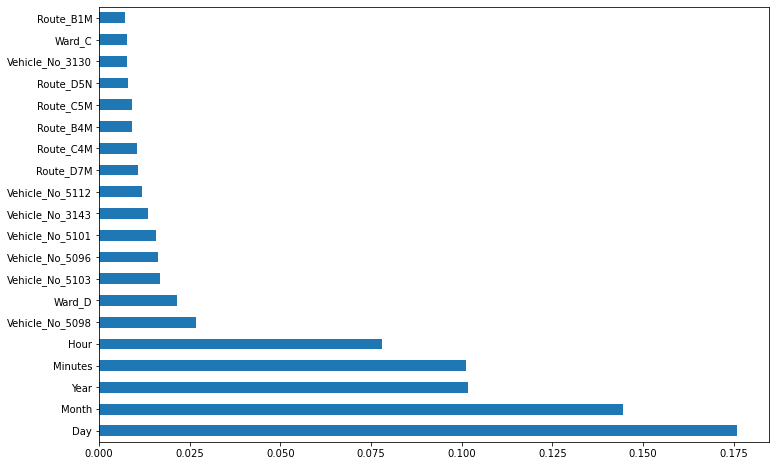

In [62]:
# Mapping the values of feature_importance to represent in bar graph. 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [63]:
X1 = df[['Day','Month','Year',
 'Hour',
 'Minutes',    
 'Ward_B',
 'Ward_C',
 'Ward_D',
 'Vehicle_No_3130',
 'Vehicle_No_5112',
 'Vehicle_No_3143',
 'Vehicle_No_5103',
 'Vehicle_No_5101',
 'Vehicle_No_5096',
 'Vehicle_No_5098',
 'Route_B4M',
 'Route_C5M',
 'Route_D5N',
 'Route_D3M',
 'Route_C4M',
 'Route_D7M']]
y1 = df['Waste (kg)']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4,random_state=1)
reg = LinearRegression()
result=reg.fit(X_train, y_train)

In [65]:
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.3040838188470434


In [66]:
y_pred = reg.predict(X_test)

In [67]:
reg.score(X_test,y_test)

0.3149158490170286

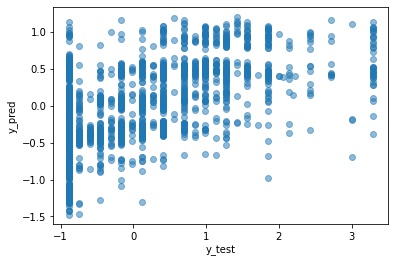

In [68]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

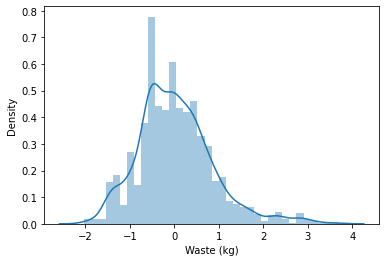

In [69]:
# distribution of actual-test
sns.distplot(y_test-y_pred)
plt.show()

# Training Model for Ward - "A"

In [70]:
# splitting data for each ward
df1_a=df1.loc[df1['Ward'] == 'A']
df1_b=df1.loc[df1['Ward'] == 'B']
df1_c=df1.loc[df1['Ward'] == 'C']
df1_d=df1.loc[df1['Ward'] == 'D']

In [71]:
df1_a.head()

,Day,Ward,Vehicle_No,Route,Waste (kg),Month,Year,Hour,Minutes
0,14,A,5102,A1M,0,10,2020,9,10
1,14,A,3137,A2M,0,10,2020,9,15
2,14,A,3127,A3M,15,10,2020,9,20
3,14,A,3136,A1M,20,10,2020,9,30
4,14,A,3137,A2M,0,10,2020,11,30


In [72]:
df=df1_a.copy()
df=pd.get_dummies(df, drop_first=True)

In [73]:
df.head()

,Day,Waste (kg),Month,Year,Hour,Minutes,Vehicle_No_3125,Vehicle_No_3127,Vehicle_No_3129,Vehicle_No_3130,...,Route_A3O,Route_A3P,Route_A3Q,Route_A4M,Route_A4N,Route_A4P,Route_A5M,Route_A5N,Route_A5O,Route_A7M
0,14,0,10,2020,9,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,10,2020,9,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,15,10,2020,9,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,20,10,2020,9,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,10,2020,11,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Standardization
scaler = StandardScaler()
num_vars = ['Day','Waste (kg)','Month','Year','Hour','Minutes']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [75]:
X = df.drop(['Waste (kg)'], axis=1)
y = df['Waste (kg)']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
reg = LinearRegression()
result=reg.fit(X_train, y_train)

In [77]:
y_pred = reg.predict(X_test)

In [78]:
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.3827874656196818


# Feature Selection for Ward - "A" 

In [79]:
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[1.70383841e-01 2.02791058e-01 1.27898913e-01 9.97259740e-02
 1.17752115e-01 6.64403439e-05 7.64966304e-03 4.17317187e-04
 7.44283592e-20 2.54241094e-05 3.24141087e-04 2.65283538e-02
 2.19221242e-02 9.29965992e-04 1.20348406e-04 8.59411788e-03
 7.18233472e-06 5.17713692e-03 1.36275842e-04 8.51481659e-03
 2.33234075e-02 2.02600230e-04 1.99376639e-02 8.19517991e-03
 2.25098308e-02 4.11425578e-03 1.10509850e-02 4.88762327e-04
 7.22417688e-04 1.35809736e-04 8.97115778e-03 1.49297795e-02
 9.60816253e-03 1.14030312e-02 4.57285715e-04 1.34477176e-04
 2.20491760e-04 1.07651774e-02 5.57449602e-03 1.66453274e-04
 7.57869991e-06 3.92328657e-05 1.05821410e-02 7.51859255e-03
 2.44167924e-06 1.35265217e-02 1.40658345e-02 1.65995438e-03
 7.21069260e-04]


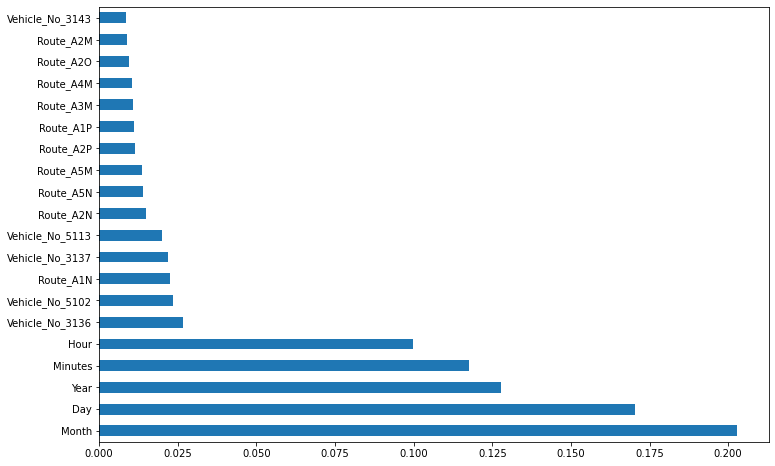

In [80]:
# Mapping the values of feature_importance to represent in bar graph. 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:
X1 = df[['Day','Month','Year',
 'Hour',
 'Minutes',
 'Vehicle_No_3137',
 'Vehicle_No_3147',
 'Vehicle_No_5102',
 'Vehicle_No_5113',
 'Vehicle_No_3143',
 'Vehicle_No_3136',
 'Route_A2O','Route_A2N',
 'Route_A1M','Route_A3M','Route_A4M','Route_A1N','Route_A5M','Route_A1P','Route_A2P']]
y1 = df['Waste (kg)']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,random_state=1)
reg = LinearRegression()
result=reg.fit(X_train, y_train)

In [83]:
y_pred = reg.predict(X_test)

In [84]:
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.3628557325261623


## Training Model for Ward - "D"

In [85]:
df=df1_d.copy()

In [86]:
df1_d.head()

,Day,Ward,Vehicle_No,Route,Waste (kg),Month,Year,Hour,Minutes
3350,14,D,3135,D3M,20,10,2020,9,15
3351,14,D,3141,D1M,50,10,2020,9,25
3352,14,D,3143,D2M,20,10,2020,10,15
3353,14,D,3129,D4M,100,10,2020,10,30
3354,14,D,3125,D5M,20,10,2020,11,0


In [87]:
df=pd.get_dummies(df, drop_first=True)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['Day','Waste (kg)','Month','Year','Hour','Minutes']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [89]:
X = df.drop(['Waste (kg)'], axis=1)
y = df['Waste (kg)']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [92]:
result=reg.fit(X_train, y_train)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.45382820905308485


In [94]:
y_pred = reg.predict(X_test)

In [95]:
reg.score(X_test,y_test)

0.4366723998004839

## Feature Selection for Ward D - Regression

In [96]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[2.04371207e-01 1.36095837e-01 1.45760294e-01 6.64135375e-02
 9.84946218e-02 6.12079642e-03 1.31097468e-02 1.18156127e-03
 4.33187543e-03 2.10326042e-04 4.33152865e-04 5.06173069e-03
 2.92188217e-05 2.18507783e-02 5.59865577e-05 9.72377458e-05
 7.69452143e-02 4.76731163e-02 4.57760426e-04 7.99916341e-03
 1.95074226e-04 6.82082881e-03 2.86846329e-03 1.05342136e-02
 4.79978434e-03 1.23273708e-04 2.91730601e-03 3.08183106e-03
 3.58272687e-03 1.86726678e-04 1.23056740e-02 4.43499824e-02
 3.01516259e-03 6.46724245e-02 5.39400129e-04 2.25515979e-03
 7.72092746e-04 2.86712487e-04]


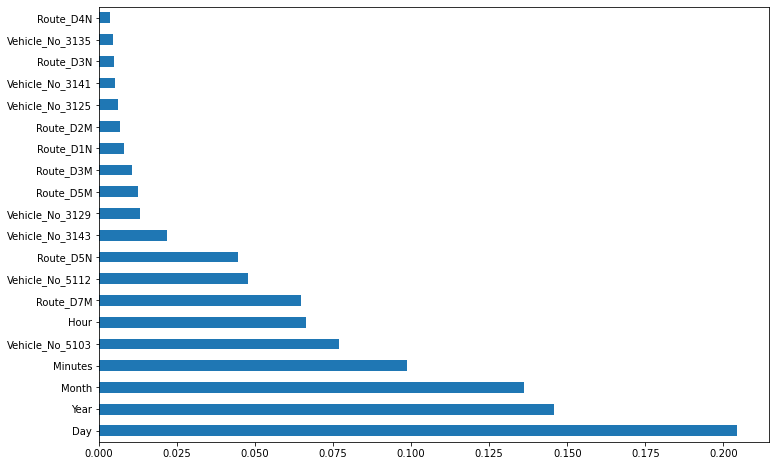

In [97]:
# Mapping the values of feature_importance to represent in bar graph. 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [98]:
X1 = df[['Day','Month','Year',
 'Hour',
 'Minutes',
 'Vehicle_No_3135',
 'Vehicle_No_3141',
 'Vehicle_No_3125',
 'Vehicle_No_3129',
 'Vehicle_No_3143',
 'Vehicle_No_5112',
 'Vehicle_No_5103',
 'Route_D4N','Route_D3N',
 'Route_D2M','Route_D1N','Route_D3M','Route_D5M','Route_D5N','Route_D7M']]
y1 = df['Waste (kg)']

In [99]:
df.head()

,Day,Waste (kg),Month,Year,Hour,Minutes,Vehicle_No_3125,Vehicle_No_3129,Vehicle_No_3134,Vehicle_No_3135,...,Route_D4N,Route_D4O,Route_D5M,Route_D5N,Route_D5O,Route_D7M,Route_D7N,Route_D8M,Route_D8N,Route_D9M
3350,-0.196019,-0.626587,0.533946,-0.794811,-0.661272,-0.766431,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3351,-0.196019,0.176271,0.533946,-0.794811,-0.661272,-0.177864,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3352,-0.196019,-0.626587,0.533946,-0.794811,-0.111915,-0.766431,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3353,-0.196019,1.514368,0.533946,-0.794811,-0.111915,0.116420,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3354,-0.196019,-0.626587,0.533946,-0.794811,0.437442,-1.649282,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4,
                                                    random_state=1)

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [102]:
result=reg.fit(X_train, y_train)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.44893239097471704


In [104]:
y_pred = reg.predict(X_test)

In [105]:
reg.score(X_test,y_test)

0.4306447204029872

# Classification Problem

### Creating bins 

In [106]:
# creating bins as per waste in kgs
# 0-15,16-30,31-45,46-60,61-75,76-90,91-105,106-120,121-135,136-150

In [107]:
for i in df2['Waste (kg)']:
    if i<=15:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_1')
    elif i>15 and i<=30:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_2')
    elif i>30 and i<=45:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_3')
    elif i>45 and i<=60:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_4')
    elif i>60 and i<=75:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_5')
    elif i>75 and i<=90:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_6')
    elif i>90 and i<=105:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_7')
    elif i>105 and i<=120:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_8')
    elif i>120 and i<=135:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_9')
    else:
        df2['Waste (kg)']=df2['Waste (kg)'].replace(i,'bin_10')

In [108]:
le=LabelEncoder()
df2['Waste (kg)']=le.fit_transform(df2['Waste (kg)'])

In [109]:
df2.head()

,Day,Ward,Vehicle_No,Route,Waste (kg),Month,Year,Hour,Minutes
0,14,A,5102,A1M,0,10,2020,9,10
1,14,A,3137,A2M,0,10,2020,9,15
2,14,A,3127,A3M,0,10,2020,9,20
3,14,A,3136,A1M,2,10,2020,9,30
4,14,A,3137,A2M,0,10,2020,11,30


In [110]:
# checking labels created for bins
#df11 = df2.drop_duplicates('Waste (kg)')
#print(df11)

In [111]:
X=df2.drop(['Waste (kg)'], axis=1)
y=df2['Waste (kg)']

In [112]:
X.head()

,Day,Ward,Vehicle_No,Route,Month,Year,Hour,Minutes
0,14,A,5102,A1M,10,2020,9,10
1,14,A,3137,A2M,10,2020,9,15
2,14,A,3127,A3M,10,2020,9,20
3,14,A,3136,A1M,10,2020,9,30
4,14,A,3137,A2M,10,2020,11,30


In [113]:
X=pd.get_dummies(X, drop_first=True)

# Handling Imbalanced Classes

In [114]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("Before OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("Before OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("Before OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("Before OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("Before OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("Before OverSampling, counts of label '9': {}".format(sum(y == 9))) 

Before OverSampling, the shape of X: (4853, 121)
Before OverSampling, the shape of y: (4853,) 

Before OverSampling, counts of label '0': 2066
Before OverSampling, counts of label '1': 84
Before OverSampling, counts of label '2': 714
Before OverSampling, counts of label '3': 394
Before OverSampling, counts of label '4': 595
Before OverSampling, counts of label '5': 394
Before OverSampling, counts of label '6': 371
Before OverSampling, counts of label '7': 150
Before OverSampling, counts of label '8': 51
Before OverSampling, counts of label '9': 34


In [115]:
# using SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X, y = sm.fit_sample(X, y.ravel())

In [116]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("After OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("After OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("After OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("After OverSampling, counts of label '9': {}".format(sum(y == 9))) 

After OverSampling, the shape of X: (20660, 121)
After OverSampling, the shape of y: (20660,) 

After Sampling, counts of label '0': 2066
After OverSampling, counts of label '1': 2066
After OverSampling, counts of label '2': 2066
After OverSampling, counts of label '3': 2066
After OverSampling, counts of label '4': 2066
After OverSampling, counts of label '5': 2066
After OverSampling, counts of label '6': 2066
After OverSampling, counts of label '7': 2066
After OverSampling, counts of label '8': 2066
After OverSampling, counts of label '9': 2066


In [117]:
X1=X.copy()
y1=y.copy()

# Logistic Regression

In [118]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=1)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [119]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [120]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2,3,4,5,6,7,8,9
0,0.181349,0.053743,0.207985,0.143570,0.144330,0.068440,0.056854,0.053319,0.046637,0.043773
1,0.197584,0.029722,0.226735,0.154706,0.105341,0.047950,0.046613,0.047835,0.111540,0.031975
2,0.041561,0.134301,0.025601,0.054522,0.075855,0.124698,0.130361,0.142092,0.127503,0.143505
3,0.097955,0.093358,0.082445,0.098619,0.108332,0.105494,0.103347,0.105600,0.120044,0.084806
4,0.050118,0.181502,0.037828,0.054828,0.097314,0.151630,0.134389,0.123131,0.054473,0.114787


In [121]:
model_lr.score(X_train, y_train)

0.20516295579219104

In [122]:
model_lr.score(X_test, y_test)

0.19593417231364957

# XGBOOST

In [177]:
from sklearn.model_selection import GridSearchCV, KFold

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33)

In [138]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[08:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 64.51
Time consumed for training: 13.215
Time consumed for prediction: 0.07265 seconds


## Cross-Validation

In [186]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[18:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Random Forest Classifier

In [143]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 69.17
Time consumed for training: 0.395 seconds
Time consumed for prediction: 0.03272 seconds


## Hyperparameter Tuning

In [141]:
# Random forest
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.668761739633001
Best score: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}


In [142]:
rfc = RandomForestClassifier(n_estimators=500, criterion='gini',max_leaf_nodes=None,min_samples_split=4,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 71.14
Time consumed for training: 16.791 seconds
Time consumed for prediction: 1.53387 seconds


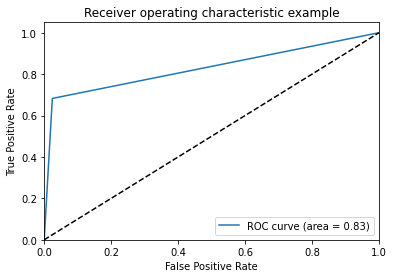

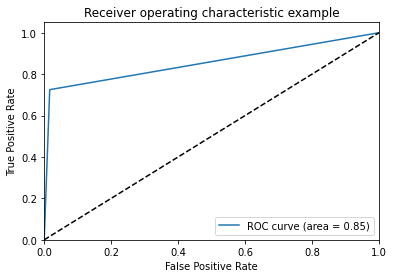

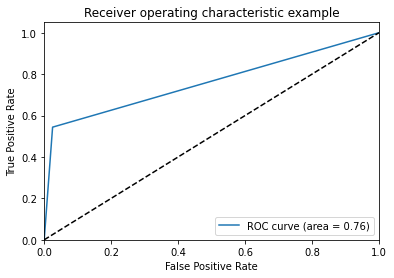

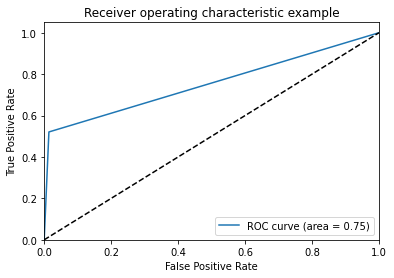

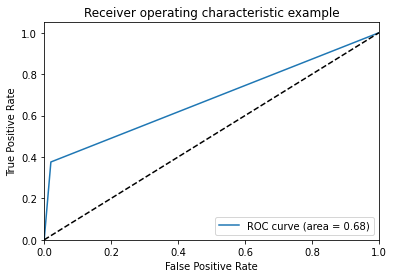

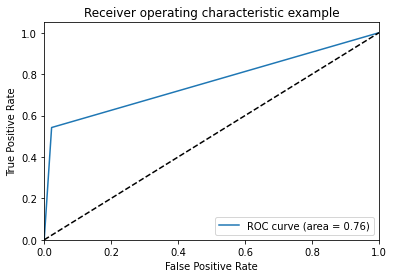

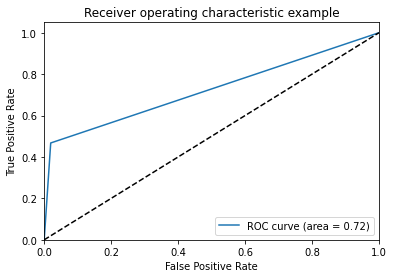

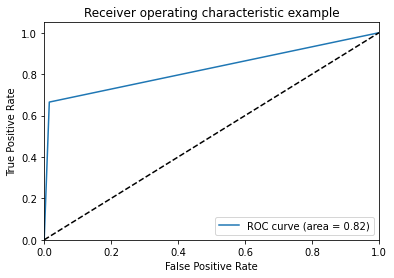

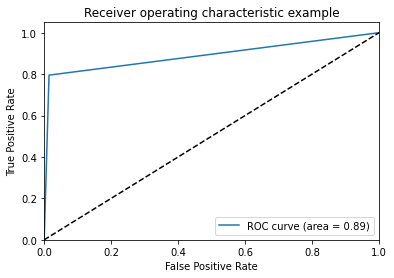

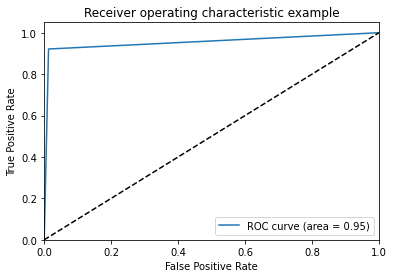

In [125]:
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes =10

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.30, random_state=1)

# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200))
y_score = clf.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Feature Selection

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
features = X
label = y
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
print(New_features.shape)

(20660, 7)


In [134]:
test_features = X1
Test_features = model.transform(test_features)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Classifiers = [DecisionTreeClassifier(),LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),RandomForestClassifier(n_estimators=200)]

In [137]:
from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(New_features,label)
    pred=fit.predict(Test_features)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(y1,pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(y1,pred)))

Accuracy of DecisionTreeClassifier is 0.8918683446272991
Accuracy of LogisticRegression is 0.12744433688286544
Accuracy of RandomForestClassifier is 0.8918683446272991


In [ ]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# Training Model for Ward -  "A"

In [147]:
df_a=df2.loc[df2['Ward'] == 'A']

In [148]:
df_a.shape

(1253, 9)

In [149]:
X = df_a.drop(['Waste (kg)'], axis=1)
y = df_a['Waste (kg)']

In [150]:
X.head()

,Day,Ward,Vehicle_No,Route,Month,Year,Hour,Minutes
0,14,A,5102,A1M,10,2020,9,10
1,14,A,3137,A2M,10,2020,9,15
2,14,A,3127,A3M,10,2020,9,20
3,14,A,3136,A1M,10,2020,9,30
4,14,A,3137,A2M,10,2020,11,30


In [151]:
y.head()

0    0
1    0
2    0
3    2
4    0
Name: Waste (kg), dtype: int32

In [152]:
X=pd.get_dummies(X, drop_first=True)

In [153]:
X.head()

,Day,Month,Year,Hour,Minutes,Vehicle_No_3125,Vehicle_No_3127,Vehicle_No_3129,Vehicle_No_3130,Vehicle_No_3134,...,Route_A3O,Route_A3P,Route_A3Q,Route_A4M,Route_A4N,Route_A4P,Route_A5M,Route_A5N,Route_A5O,Route_A7M
0,14,10,2020,9,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,10,2020,9,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,10,2020,9,20,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,10,2020,9,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,10,2020,11,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("Before OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("Before OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("Before OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("Before OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("Before OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("Before OverSampling, counts of label '9': {}".format(sum(y == 9))) 

Before OverSampling, the shape of X: (1253, 49)
Before OverSampling, the shape of y: (1253,) 

Before OverSampling, counts of label '0': 498
Before OverSampling, counts of label '1': 16
Before OverSampling, counts of label '2': 271
Before OverSampling, counts of label '3': 107
Before OverSampling, counts of label '4': 151
Before OverSampling, counts of label '5': 99
Before OverSampling, counts of label '6': 67
Before OverSampling, counts of label '7': 29
Before OverSampling, counts of label '8': 7
Before OverSampling, counts of label '9': 8


In [155]:
sm = SMOTE(random_state=33)
X, y = sm.fit_sample(X, y.ravel())

In [156]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("After OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("After OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("After OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("After OverSampling, counts of label '9': {}".format(sum(y == 9))) 

After OverSampling, the shape of X: (4980, 49)
After OverSampling, the shape of y: (4980,) 

After Sampling, counts of label '0': 498
After OverSampling, counts of label '1': 498
After OverSampling, counts of label '2': 498
After OverSampling, counts of label '3': 498
After OverSampling, counts of label '4': 498
After OverSampling, counts of label '5': 498
After OverSampling, counts of label '6': 498
After OverSampling, counts of label '7': 498
After OverSampling, counts of label '8': 498
After OverSampling, counts of label '9': 498


In [157]:
X1=X.copy()
y1=y.copy()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [159]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [160]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2,3,4,5,6,7,8,9
0,0.050504,0.098065,0.045071,0.062986,0.081085,0.119427,0.130760,0.091639,0.204604,0.115859
1,0.039477,0.150934,0.027250,0.069695,0.084514,0.120227,0.100739,0.160974,0.087445,0.158745
2,0.030984,0.148971,0.025720,0.043968,0.084424,0.205263,0.189645,0.201109,0.006183,0.063733
3,0.246274,0.016704,0.197634,0.248098,0.143887,0.024442,0.013480,0.019650,0.036606,0.053226
4,0.038231,0.136026,0.033851,0.052297,0.082505,0.168980,0.182846,0.141742,0.062438,0.101082


In [161]:
model_lr.score(X_train, y_train)

0.30254350736278446

In [162]:
model_lr.score(X_test, y_test)

0.2859437751004016

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33)

In [164]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[10:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 71.47
Time consumed for training: 2.518
Time consumed for prediction: 0.02139 seconds


In [178]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 69.28
Time consumed for training: 0.072 seconds
Time consumed for prediction: 0.00857 seconds


In [179]:
# Random forest

params = {
    'n_estimators': [10,100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.6927458033573141
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [180]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy',max_leaf_nodes=None,min_samples_split=5,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 71.59
Time consumed for training: 1.549 seconds
Time consumed for prediction: 0.13374 seconds


In [ ]:
def predict_price(vehicle,route,day,month,year,hour,minute):    
    #ward_index1 = np.where(X.columns==ward)[0][0]
    vehicle_index1 = np.where(X.columns==vehicle)[0][0]
    route_index1 = np.where(X.columns==route)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = day
    x[1] = month
    x[2] = year
    x[3] = hour
    x[4] = minute
    
    
    #if ward_index1 >= 0:
        #x[ward_index1] = 1
    #else:
    if vehicle_index1 >= 0:
        x[vehicle_index1] = 1
    else:
        if route_index1 >= 0:
            x[route_index1] = 1

    return rfc.predict([x])[0]

In [ ]:
predict_price('Vehicle_No_3136','Route_A1M',18,3,2021,10,45)

In [ ]:

import pickle
# open a file, where you ant to store the data
file = open('waste_a.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_a.json","w") as f:
    f.write(json.dumps(columns))

# Ward B

In [166]:
df_b=df2.loc[df2['Ward'] == 'B']

In [167]:
df_b.shape

(1292, 9)

In [168]:
X = df_b.drop(['Waste (kg)'], axis=1)
y = df_b['Waste (kg)']

In [169]:
X.head()

,Day,Ward,Vehicle_No,Route,Month,Year,Hour,Minutes
1193,15,B,3138,B2M,10,2020,9,15
1194,15,B,5101,B3M,10,2020,9,20
1196,15,B,3128,B4M,10,2020,10,20
1197,15,B,3128,B1M,10,2020,10,35
1198,15,B,3138,B2N,10,2020,12,0


In [170]:
y.head()

1193    2
1194    0
1196    4
1197    2
1198    0
Name: Waste (kg), dtype: int32

In [171]:
X=pd.get_dummies(X, drop_first=True)

In [172]:
X.head()

,Day,Month,Year,Hour,Minutes,Vehicle_No_3128,Vehicle_No_3130,Vehicle_No_3135,Vehicle_No_3136,Vehicle_No_3138,...,Route_B3R,Route_B4M,Route_B4N,Route_B4O,Route_B4P,Route_B4Q,Route_B4R,Route_B5M,Route_B5N,Route_B5O
1193,15,10,2020,9,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1194,15,10,2020,9,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,15,10,2020,10,20,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1197,15,10,2020,10,35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,15,10,2020,12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [173]:
X.columns.unique()

Index(['Day', 'Month', 'Year', 'Hour', 'Minutes', 'Vehicle_No_3128',
       'Vehicle_No_3130', 'Vehicle_No_3135', 'Vehicle_No_3136',
       'Vehicle_No_3138', 'Vehicle_No_3142', 'Vehicle_No_3144',
       'Vehicle_No_5096', 'Vehicle_No_5098', 'Vehicle_No_5101', 'Route_B1M',
       'Route_B1N', 'Route_B1O', 'Route_B2M', 'Route_B2N', 'Route_B2N ',
       'Route_B2O', 'Route_B3M', 'Route_B3N', 'Route_B3O', 'Route_B3P',
       'Route_B3Q', 'Route_B3R', 'Route_B4M', 'Route_B4N', 'Route_B4O',
       'Route_B4P', 'Route_B4Q', 'Route_B4R', 'Route_B5M', 'Route_B5N',
       'Route_B5O'],
      dtype='object')

In [174]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("Before OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("Before OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("Before OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("Before OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("Before OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("Before OverSampling, counts of label '9': {}".format(sum(y == 9))) 

Before OverSampling, the shape of X: (1292, 37)
Before OverSampling, the shape of y: (1292,) 

Before OverSampling, counts of label '0': 702
Before OverSampling, counts of label '1': 23
Before OverSampling, counts of label '2': 139
Before OverSampling, counts of label '3': 84
Before OverSampling, counts of label '4': 149
Before OverSampling, counts of label '5': 91
Before OverSampling, counts of label '6': 65
Before OverSampling, counts of label '7': 20
Before OverSampling, counts of label '8': 9
Before OverSampling, counts of label '9': 10


In [175]:
sm = SMOTE(random_state=33)
X, y = sm.fit_sample(X, y.ravel())

In [176]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("After OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("After OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("After OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("After OverSampling, counts of label '9': {}".format(sum(y == 9))) 

After OverSampling, the shape of X: (7020, 37)
After OverSampling, the shape of y: (7020,) 

After Sampling, counts of label '0': 702
After OverSampling, counts of label '1': 702
After OverSampling, counts of label '2': 702
After OverSampling, counts of label '3': 702
After OverSampling, counts of label '4': 702
After OverSampling, counts of label '5': 702
After OverSampling, counts of label '6': 702
After OverSampling, counts of label '7': 702
After OverSampling, counts of label '8': 702
After OverSampling, counts of label '9': 702


In [177]:
X1=X.copy()
y1=y.copy()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [179]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [180]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2,3,4,5,6,7,8,9
0,0.070164,0.034972,0.026978,0.096921,0.088309,0.192551,0.229995,0.097865,0.012960,0.149284
1,0.137005,0.007843,0.220952,0.093778,0.046361,0.022708,0.051881,0.019328,0.390514,0.009630
2,0.175432,0.014537,0.266101,0.107132,0.056378,0.023442,0.056846,0.029690,0.262501,0.007939
3,0.195771,0.088906,0.263799,0.141911,0.112345,0.024916,0.047688,0.065081,0.046828,0.012755
4,0.136840,0.035005,0.103375,0.147120,0.109981,0.102550,0.151513,0.074592,0.074544,0.064481


In [181]:
model_lr.score(X_test,y_test)

0.27806267806267804

In [182]:
model_lr.score(X_test, y_test)

0.27806267806267804

In [183]:
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 10.0, 'penalty': 'l2'}
Best Accuracy: 0.2826617826617827


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33)

In [185]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[09:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 80.79
Time consumed for training: 3.940
Time consumed for prediction: 0.03409 seconds


In [186]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 78.46
Time consumed for training: 0.114 seconds
Time consumed for prediction: 0.01074 seconds


In [187]:
# Random forest
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [10,100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.7799263291787679
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [188]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy',max_leaf_nodes=None,min_samples_split=2,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 80.10
Time consumed for training: 1.801 seconds
Time consumed for prediction: 0.15551 seconds


In [ ]:
def predict_price(vehicle,route,day,month,year,hour,minute):    
    #ward_index1 = np.where(X.columns==ward)[0][0]
    vehicle_index1 = np.where(X.columns==vehicle)[0][0]
    route_index1 = np.where(X.columns==route)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = day
    x[1] = month
    x[2] = year
    x[3] = hour
    x[4] = minute
    
    
    #if ward_index1 >= 0:
        #x[ward_index1] = 1
    #else:
    if vehicle_index1 >= 0:
        x[vehicle_index1] = 1
    else:
        if route_index1 >= 0:
            x[route_index1] = 1

    return rfc.predict([x])[0]

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('waste_b.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_b.json","w") as f:
    f.write(json.dumps(columns))

# Ward C

In [189]:
df_c=df2.loc[df2['Ward'] == 'C']

In [190]:
df_c.shape

(1125, 9)

In [191]:
X = df_c.drop(['Waste (kg)'], axis=1)
y = df_c['Waste (kg)']

In [192]:
X=pd.get_dummies(X, drop_first=True)

In [193]:
X.head()

,Day,Month,Year,Hour,Minutes,Vehicle_No_3133,Vehicle_No_3135,Vehicle_No_3139,Vehicle_No_3140,Vehicle_No_3141,...,Route_C3N,Route_C4M,Route_C4N,Route_C5M,Route_C5N,Route_C5O,Route_C5P,Route_C6M,Route_C6N,Route_C6O
2323,14,10,2020,8,50,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2324,14,10,2020,11,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2325,14,10,2020,12,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2326,14,10,2020,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2327,15,10,2020,8,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
X.columns.unique()

Index(['Day', 'Month', 'Year', 'Hour', 'Minutes', 'Vehicle_No_3133',
       'Vehicle_No_3135', 'Vehicle_No_3139', 'Vehicle_No_3140',
       'Vehicle_No_3141', 'Vehicle_No_3142', 'Vehicle_No_3146',
       'Vehicle_No_5096', 'Route_C1N', 'Route_C1O', 'Route_C2M', 'Route_C2N',
       'Route_C3M', 'Route_C3N', 'Route_C4M', 'Route_C4N', 'Route_C5M',
       'Route_C5N', 'Route_C5O', 'Route_C5P', 'Route_C6M', 'Route_C6N',
       'Route_C6O'],
      dtype='object')

In [195]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("Before OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("Before OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("Before OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("Before OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("Before OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("Before OverSampling, counts of label '9': {}".format(sum(y == 9))) 

Before OverSampling, the shape of X: (1125, 28)
Before OverSampling, the shape of y: (1125,) 

Before OverSampling, counts of label '0': 512
Before OverSampling, counts of label '1': 24
Before OverSampling, counts of label '2': 127
Before OverSampling, counts of label '3': 83
Before OverSampling, counts of label '4': 135
Before OverSampling, counts of label '5': 93
Before OverSampling, counts of label '6': 90
Before OverSampling, counts of label '7': 37
Before OverSampling, counts of label '8': 17
Before OverSampling, counts of label '9': 7


In [196]:
sm = SMOTE(random_state=33)
X, y = sm.fit_sample(X, y.ravel())

In [197]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("After OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("After OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("After OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("After OverSampling, counts of label '9': {}".format(sum(y == 9))) 

After OverSampling, the shape of X: (5120, 28)
After OverSampling, the shape of y: (5120,) 

After Sampling, counts of label '0': 512
After OverSampling, counts of label '1': 512
After OverSampling, counts of label '2': 512
After OverSampling, counts of label '3': 512
After OverSampling, counts of label '4': 512
After OverSampling, counts of label '5': 512
After OverSampling, counts of label '6': 512
After OverSampling, counts of label '7': 512
After OverSampling, counts of label '8': 512
After OverSampling, counts of label '9': 512


In [198]:
X1=X.copy()
y1=y.copy()

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [200]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [201]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2,3,4,5,6,7,8,9
0,0.164684,0.025476,0.186267,0.199360,0.215380,0.054891,0.032046,0.053067,0.011736,0.057092
1,0.222849,0.025018,0.303109,0.219472,0.102122,0.063553,0.018405,0.024346,0.014432,0.006695
2,0.058669,0.133453,0.029318,0.044091,0.068187,0.131563,0.145320,0.132836,0.160589,0.095975
3,0.025144,0.137886,0.012419,0.027757,0.076220,0.099951,0.143948,0.115506,0.105272,0.255898
4,0.047022,0.099055,0.022558,0.037998,0.083220,0.100028,0.146278,0.152129,0.111530,0.200183


In [202]:
model_lr.score(X_train, y_train)

0.24479166666666666

In [203]:
model_lr.score(X_test, y_test)

0.25625

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33)

In [209]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[09:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 73.14
Time consumed for training: 1.657
Time consumed for prediction: 0.02048 seconds


In [212]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 71.24
Time consumed for training: 0.068 seconds
Time consumed for prediction: 0.00974 seconds


In [213]:
# Random forest
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [10,100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.6997093384888661
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [214]:
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy',max_leaf_nodes=None,min_samples_split=2,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 72.84
Time consumed for training: 3.553 seconds
Time consumed for prediction: 0.25089 seconds


In [ ]:
def predict_price(vehicle,route,day,month,year,hour,minute):    
    #ward_index1 = np.where(X.columns==ward)[0][0]
    vehicle_index1 = np.where(X.columns==vehicle)[0][0]
    route_index1 = np.where(X.columns==route)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = day
    x[1] = month
    x[2] = year
    x[3] = hour
    x[4] = minute
    
    
    #if ward_index1 >= 0:
        #x[ward_index1] = 1
    #else:
    if vehicle_index1 >= 0:
        x[vehicle_index1] = 1
    else:
        if route_index1 >= 0:
            x[route_index1] = 1

    return rfc.predict([x])[0]

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('waste_c.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_c.json","w") as f:
    f.write(json.dumps(columns))

# Ward D

In [215]:
df2.head()

,Day,Ward,Vehicle_No,Route,Waste (kg),Month,Year,Hour,Minutes
0,14,A,5102,A1M,0,10,2020,9,10
1,14,A,3137,A2M,0,10,2020,9,15
2,14,A,3127,A3M,0,10,2020,9,20
3,14,A,3136,A1M,2,10,2020,9,30
4,14,A,3137,A2M,0,10,2020,11,30


In [216]:
df2.shape

(4853, 9)

In [217]:
df_d=df2.loc[df2['Ward'] == 'D']

In [218]:
df_d.shape

(1183, 9)

In [219]:
X = df_d.drop(['Waste (kg)'], axis=1)
y = df_d['Waste (kg)']

In [220]:
X=pd.get_dummies(X, drop_first=True)

In [221]:
X.head()

,Day,Month,Year,Hour,Minutes,Vehicle_No_3125,Vehicle_No_3129,Vehicle_No_3134,Vehicle_No_3135,Vehicle_No_3136,...,Route_D4N,Route_D4O,Route_D5M,Route_D5N,Route_D5O,Route_D7M,Route_D7N,Route_D8M,Route_D8N,Route_D9M
3350,14,10,2020,9,15,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3351,14,10,2020,9,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3352,14,10,2020,10,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3353,14,10,2020,10,30,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3354,14,10,2020,11,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
X.columns.unique()

Index(['Day', 'Month', 'Year', 'Hour', 'Minutes', 'Vehicle_No_3125',
       'Vehicle_No_3129', 'Vehicle_No_3134', 'Vehicle_No_3135',
       'Vehicle_No_3136', 'Vehicle_No_3139', 'Vehicle_No_3141',
       'Vehicle_No_3142', 'Vehicle_No_3143', 'Vehicle_No_3145',
       'Vehicle_No_3146', 'Vehicle_No_5103', 'Vehicle_No_5112',
       'Vehicle_No_5113', 'Route_D1N', 'Route_D1O', 'Route_D2M', 'Route_D2N',
       'Route_D3M', 'Route_D3N', 'Route_D3O', 'Route_D40', 'Route_D4M',
       'Route_D4N', 'Route_D4O', 'Route_D5M', 'Route_D5N', 'Route_D5O',
       'Route_D7M', 'Route_D7N', 'Route_D8M', 'Route_D8N', 'Route_D9M'],
      dtype='object')

In [223]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("Before OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("Before OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("Before OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("Before OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("Before OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("Before OverSampling, counts of label '9': {}".format(sum(y == 9))) 

Before OverSampling, the shape of X: (1183, 38)
Before OverSampling, the shape of y: (1183,) 

Before OverSampling, counts of label '0': 354
Before OverSampling, counts of label '1': 21
Before OverSampling, counts of label '2': 177
Before OverSampling, counts of label '3': 120
Before OverSampling, counts of label '4': 160
Before OverSampling, counts of label '5': 111
Before OverSampling, counts of label '6': 149
Before OverSampling, counts of label '7': 64
Before OverSampling, counts of label '8': 18
Before OverSampling, counts of label '9': 9


In [224]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X, y = sm.fit_sample(X, y.ravel())

In [225]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y == 5))) 
print("After OverSampling, counts of label '6': {}".format(sum(y == 6))) 
print("After OverSampling, counts of label '7': {}".format(sum(y == 7))) 
print("After OverSampling, counts of label '8': {}".format(sum(y == 8)))
print("After OverSampling, counts of label '9': {}".format(sum(y == 9))) 

After OverSampling, the shape of X: (3540, 38)
After OverSampling, the shape of y: (3540,) 

After Sampling, counts of label '0': 354
After OverSampling, counts of label '1': 354
After OverSampling, counts of label '2': 354
After OverSampling, counts of label '3': 354
After OverSampling, counts of label '4': 354
After OverSampling, counts of label '5': 354
After OverSampling, counts of label '6': 354
After OverSampling, counts of label '7': 354
After OverSampling, counts of label '8': 354
After OverSampling, counts of label '9': 354


In [226]:
X1=X.copy()
y1=y.copy()

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=1)

In [228]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [229]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [230]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2,3,4,5,6,7,8,9
0,0.029308,0.189197,0.023583,0.034493,0.097563,0.152231,0.155373,0.129297,0.099129,0.089827
1,0.171711,0.027651,0.145270,0.178140,0.103640,0.058115,0.056111,0.074108,0.116658,0.068595
2,0.115862,0.024164,0.122347,0.131442,0.105934,0.077946,0.060068,0.049334,0.104195,0.208708
3,0.185698,0.039662,0.228578,0.154971,0.109324,0.066890,0.047848,0.036242,0.082598,0.048189
4,0.048028,0.122336,0.034207,0.052272,0.105407,0.123608,0.143091,0.143893,0.129725,0.097432


In [231]:
model_lr.score(X_train, y_train)

0.2199623352165725

In [232]:
model_lr.score(X_test, y_test)

0.19887005649717515

In [233]:
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.35,random_state = 0)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 1000.0, 'penalty': 'l2'}
Best Accuracy: 0.20469361147327247


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [300]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[19:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 67.61
Time consumed for training: 1.767
Time consumed for prediction: 0.01965 seconds


In [237]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 63.65
Time consumed for training: 0.060 seconds
Time consumed for prediction: 0.00720 seconds


In [238]:
# Random forest
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [10,100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.6162227602905569
Best score: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [239]:
rfc = RandomForestClassifier(n_estimators=200, criterion='gini',max_leaf_nodes=None,min_samples_split=4,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 64.41
Time consumed for training: 0.921 seconds
Time consumed for prediction: 0.08975 seconds


In [ ]:
def predict_price(vehicle,route,day,month,year,hour,minute):    
    #ward_index1 = np.where(X.columns==ward)[0][0]
    vehicle_index1 = np.where(X.columns==vehicle)[0][0]
    route_index1 = np.where(X.columns==route)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = day
    x[1] = month
    x[2] = year
    x[3] = hour
    x[4] = minute
    
    
    #if ward_index1 >= 0:
        #x[ward_index1] = 1
    #else:
    if vehicle_index1 >= 0:
        x[vehicle_index1] = 1
    else:
        if route_index1 >= 0:
            x[route_index1] = 1

    return rfc.predict([x])[0]

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('waste_d.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_d.json","w") as f:
    f.write(json.dumps(columns))